In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data  = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import matplotlib.pyplot as plt
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

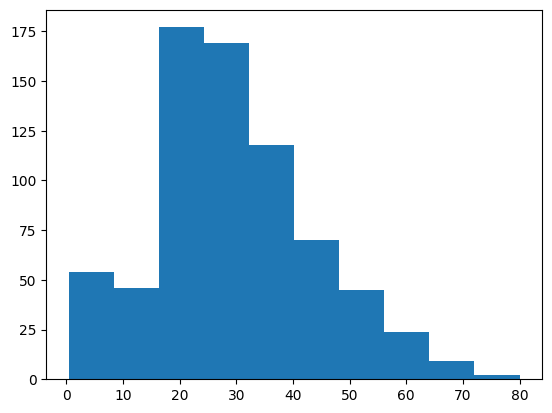

In [6]:
plt.hist(data['Age'])

In [7]:
print(data['Sex'].describe())

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


In [8]:
 data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
  ## filter women and see how many of them survived
    
filt = data['Sex'] == 'female'
data[filt]
# print("out of a total of %d women, %d survived. "%(len(df['filt']),sum(df['filt']))
print("Out of a total of %d women, %d survived." % (len(data[filt]), sum(data[filt]['Survived'])))
print(233/314 * 100)

Out of a total of 314 women, 233 survived.
74.20382165605095


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
test_data  = pd.read_csv('/kaggle/input/titanic/test.csv')
y = data['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch"]
x_data = pd.get_dummies(data[features]).astype(np.float32)
y_data = (data['Survived']).astype(np.float32)

scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)
X_test = pd.get_dummies(test_data[features]).astype(np.float32)
x_train, x_, y_train, y_ = train_test_split(x_data, y_data, test_size=0.25)

In [12]:
model = Sequential(
    [
       
        Dense(256, activation = 'relu'),
         Dense(128, activation = 'relu'),
        Dropout(0.25),
        Dense(1, activation = 'sigmoid'),
    ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
)
model.fit(x_train, y_train, epochs=500)
 

Epoch 1/500
21/21 [==============================] - 1s 3ms/step - loss: 0.6527
Epoch 2/500
21/21 [==============================] - 0s 2ms/step - loss: 0.6030
Epoch 3/500
21/21 [==============================] - 0s 2ms/step - loss: 0.5622
Epoch 4/500
21/21 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 5/500
21/21 [==============================] - 0s 2ms/step - loss: 0.5064
Epoch 6/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4870
Epoch 7/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4796
Epoch 8/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4629
Epoch 9/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4539
Epoch 10/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4503
Epoch 11/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4510
Epoch 12/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4438
Epoch 13/500
21/21 [=================

In [13]:
X_test = pd.get_dummies(test_data[features]).astype(np.float32)

predictions = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [14]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions.astype(int).tolist()})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
